**Course code : CMPE-257  Sec 99, Group name : Insurgents_Sales Prediction

Chaitrali Deshmukh(012501489)
Prathyusha Kasibhatta(013774163)
Sandhya Gadgoli(013798759)
Saylee Vyawahare(013801294)**


The dataset contains product information for different super markets and their sales records. The business objective is to cluster the products into groups according to their visibility and sales so that super market can predict their future sales for specific products.


We followed below steps:
1. Data preparation
2. Applying clustering algorithms
3. Analyzing the results based on clusters



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data preparation: 
1. Read and parse the dataset csv file using the pandas Dataframe.
2. Removed unnecessary columns and invalid/blank rows.

In [0]:
# Importing the dataset
dataset = pd.read_csv("/content/drive/My Drive/Clustering/data.csv")
X = dataset.iloc[:, [3,11]].values

In [0]:
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Applying clustering algorithms:
We applied elbow method and decided to group the data into three clusters. We applied following clustering algorithms using scikit.
1. K-Means
2. GMM
3. Agglomerative
4. DB_Scan
5. Ward Hierarchical clustering
6. Mean Shift
7. K-means with Tensor Flow


Here, we are implementing hierarchical clustering on the given dataset. Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: 

1. identify the two clusters that are closest together
2. merge the two most similar clusters. This continues until all the clusters are merged together.

The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters. The distance between two clusters has been computed based on length of the straight line drawn from one cluster to another. This is commonly referred to as the Euclidean distance.

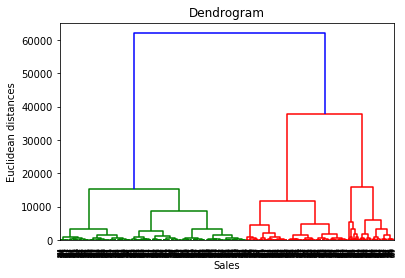

In [0]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Sales')
plt.ylabel('Euclidean distances')
plt.show()

In [0]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

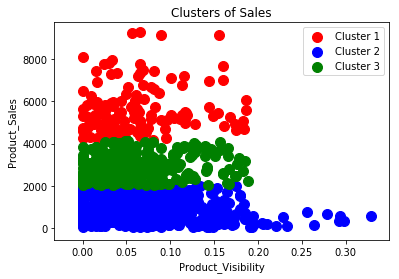

In [0]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Sales')
plt.xlabel('Product_Visibility')
plt.ylabel('Product_Sales')
plt.legend()
plt.show()

Here we are visualizing product visibility with their respective sales. Hierarchical clustering grouped our data into three clusters. So by looking at this graph, we can say that 
1. cluster 1 has moderate amount of visibility in the stores with very high sale.
2. cluster 2 has low visibilty products with low sale.
3. cluster 3 contains products ranging from low to moderate visibility resulting in average sale for those respective products.


This conclusion gives a clarity that product visibility can play a vital role and can have huge amount of impact on the overall sales of the company. 
